<a href="https://colab.research.google.com/github/M-hoseinpour/machine-learning/blob/master/CNN/cifar10(TF%2C_keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

print(tf.__version__)

2.15.0


In [6]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape : ", x_train.shape)

x_train.shape :  (50000, 32, 32, 3)


In [7]:
K = len(set(y_train))
print("number of classes : ", K)

number of classes :  10


In [11]:
model = Sequential([
    Input(shape=x_train[0].shape),
    Conv2D(32, (3, 3), strides=2, activation='relu'),
    Conv2D(64, (3, 3), strides=2, activation='relu'),
    Conv2D(128, (3, 3), strides=2, activation='relu'),
    Flatten(),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(K, activation='softmax')
])

In [12]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
res = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 58s 36ms/step - loss: 1.5704 - accuracy: 0.4263 - val_loss: 1.2969 - val_accuracy: 0.5284
Epoch 2/15
1563/1563 [==============================] - 57s 37ms/step - loss: 1.2955 - accuracy: 0.5349 - val_loss: 1.1736 - val_accuracy: 0.5761
Epoch 3/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1647 - accuracy: 0.5847 - val_loss: 1.0485 - val_accuracy: 0.6260
Epoch 4/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0765 - accuracy: 0.6154 - val_loss: 1.0290 - val_accuracy: 0.6369
Epoch 5/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9954 - accuracy: 0.6438 - val_loss: 0.9612 - val_accuracy: 0.6673
Epoch 6/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9421 - accuracy: 0.6668 - val_loss: 0.9270 - val_accuracy: 0.6779
Epoch 7/15
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8800 - accuracy: 0.6894 - val_loss: 0.8918 -

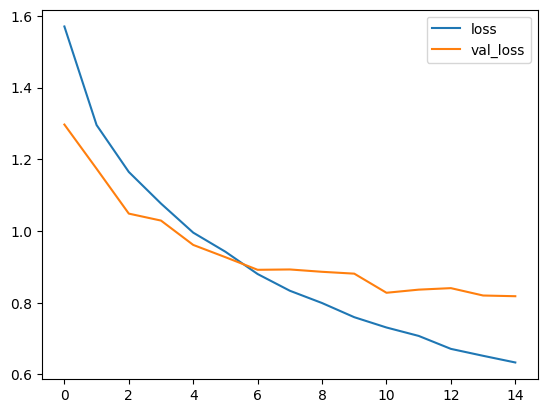

In [13]:
plt.plot(res.history["loss"], label="loss")
plt.plot(res.history["val_loss"], label="val_loss")
plt.legend()

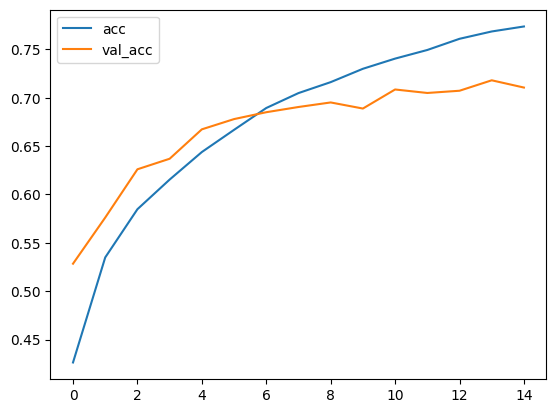

In [14]:
plt.plot(res.history["accuracy"], label="acc")
plt.plot(res.history["val_accuracy"], label="val_acc")
plt.legend()

313/313 [==============================] - 3s 8ms/step
Confusion matrix, without normalization
[[736  11  48  13  35   5  15  12  88  37]
 [ 17 769   3   7   9   5  10   3  46 131]
 [ 60   2 543  56 143  51  82  31  21  11]
 [ 18   4  59 512  88 158  77  43  20  21]
 [ 15   4  32  45 786  22  37  49   8   2]
 [  8   2  27 223  80 549  37  55   8  11]
 [  5   5  23  71  69  12 794   5   6  10]
 [ 16   0  15  40  84  50   8 767   5  15]
 [ 43  22  10  13  17   6   3   5 854  27]
 [ 41  56   8  24   9   8   5  20  34 795]]


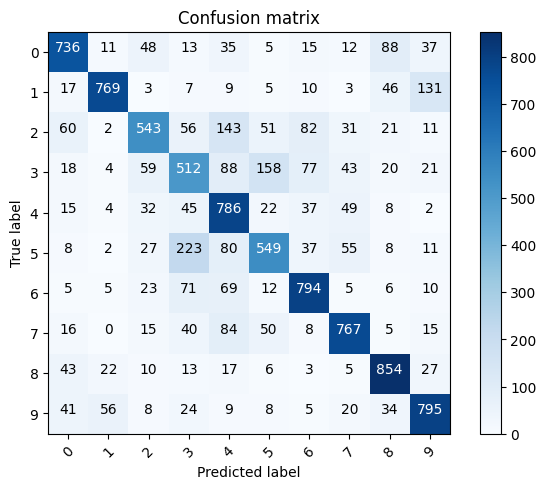

In [15]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    """This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'."""
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: dog Predicted: cat')

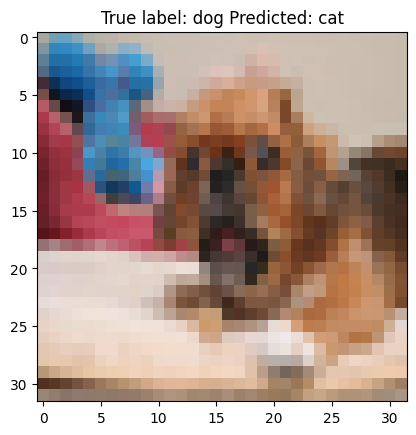

In [17]:
# Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))